Activation function
===================

In this script, the activation function for a point source electrode is ploted to anodic and cathodic stimulation. Then two simulation are performed. The first is an example of stimulation over the threshold and a spike is initiated at the midle of the fiber and propagates. The second shows a sub-threshold stimulation with no AP produced.

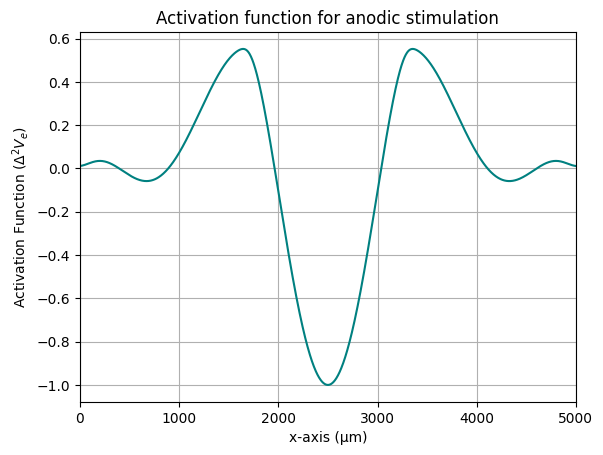

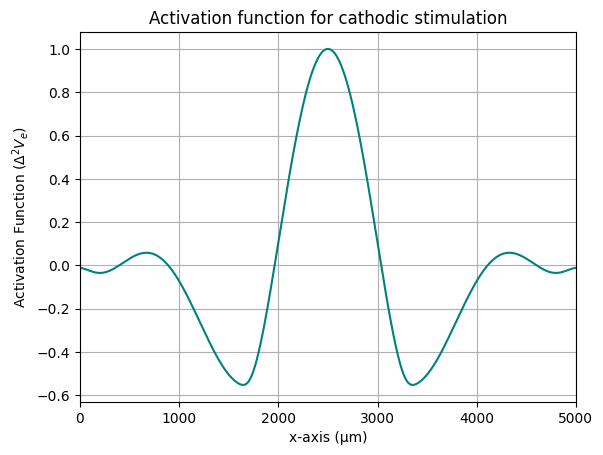

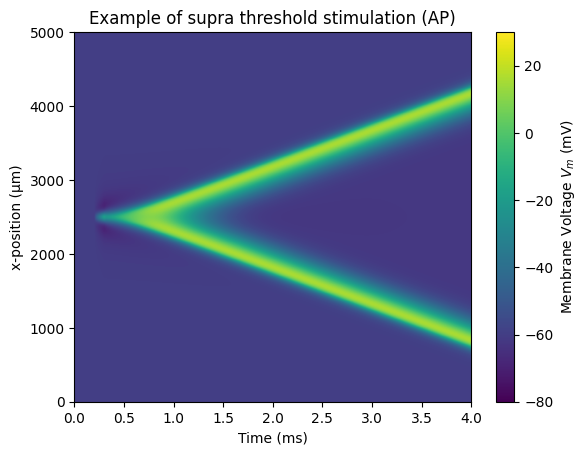

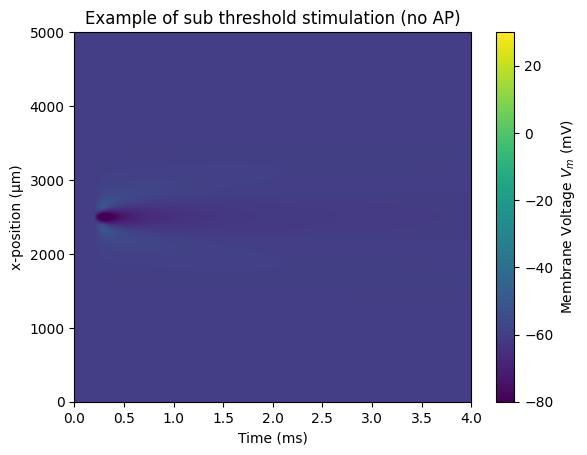

In [ ]:
import nrv
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import signal
import numpy as np

window_length_filter = 501
polyorder_filter = 3
def get_first_derivative(ftp):
    ftp = signal.savgol_filter(ftp, window_length=window_length_filter, polyorder=polyorder_filter, mode="nearest")
    ftp = np.gradient(ftp)
    ftp = signal.savgol_filter(ftp, window_length=window_length_filter, polyorder=polyorder_filter, mode="nearest")
    return(ftp)

def get_second_derivative(ftp):
    ftp=get_first_derivative(ftp)
    ftp = np.gradient(ftp)
    ftp = signal.savgol_filter(ftp, window_length=window_length_filter, polyorder=polyorder_filter, mode="nearest")
    return(ftp)

if __name__ == '__main__':
    
    nseg = 1500
    tsim = 4
    # axon def
    y = 0						# axon y position, in [um]
    z = 0						# axon z position, in [um]
    d = 1						# axon diameter, in [um]
    L = 5000					# axon length, along x axis, in [um]
    axon1 = nrv.unmyelinated(y,z,d,L,Nsec = nseg,model ='Sundt')

    # electrode def
    x_elec = L/2				# electrode x position, in [um]
    y_elec = 100				# electrode y position, in [um]
    z_elec = 0					# electrode y position, in [um]
    E1 = nrv.point_source_electrode(x_elec,y_elec,z_elec)

    # load material properties
    epineurium = nrv.load_material('endoneurium_bhadra')

    # stimulus def
    start = 0.2
    I_cathod = 70
    T_cathod = 100e-3

    stim1 = nrv.stimulus()
    stim1.biphasic_pulse(start, I_cathod, T_cathod, 0, 0)

    # extracellular stimulation setup
    extra_stim = nrv.stimulation(epineurium)
    extra_stim.add_electrode(E1, stim1)
    axon1.attach_extracellular_stimulation(extra_stim)

    axon1.get_electrodes_footprints_on_axon()

    ftp = axon1.footprints[0]
    acti_function = get_second_derivative(-ftp)
    acti_function = acti_function/np.max(acti_function)

    acti_function_ano = get_second_derivative(ftp)
    acti_function_ano = -acti_function_ano/np.min(acti_function_ano)


    x_vect= np.linspace(0,5000,nseg)
    color = 'teal'

    plt.figure()
    plt.plot(x_vect,acti_function_ano,color = color)
    plt.ylabel(r'Activation Function ($\Delta^2V_e$)')
    plt.xlabel('x-axis (µm)')
    plt.xlim(np.min(x_vect),np.max(x_vect))
    plt.title('Activation function for anodic stimulation')
    plt.grid()

    plt.figure()
    plt.plot(x_vect,acti_function,color = color)
    plt.ylabel(r'Activation Function ($\Delta^2V_e$)')
    plt.xlabel('x-axis (µm)')
    plt.xlim(np.min(x_vect),np.max(x_vect))
    plt.title('Activation function for cathodic stimulation')
    plt.grid()

    # simulate the axon
    results = axon1.simulate(t_sim=tsim)
    del axon1

    fig, ax = plt.subplots(1)
    norm = mpl.colors.Normalize(vmin=-80, vmax=30)
    cbar = results.colormap_plot(ax, "V_mem",norm=norm)
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('x-position (µm)')
    ax.set_title('Example of supra threshold stimulation (AP)')
    cbar.set_label(r'Membrane Voltage $V_m$ (mV)')


    axon1 = nrv.unmyelinated(y,z,d,L,Nsec = nseg,model ='Sundt')

    E1 = nrv.point_source_electrode(x_elec,y_elec,z_elec)
    I_cathod =-70
    stim1 = nrv.stimulus()
    stim1.biphasic_pulse(start, I_cathod, T_cathod, 0, 0)
    # extracellular stimulation setup
    extra_stim = nrv.stimulation(epineurium)
    extra_stim.add_electrode(E1, stim1)
    axon1.attach_extracellular_stimulation(extra_stim)

    # simulate the axon
    results = axon1.simulate(t_sim=tsim)
    del axon1

    fig, ax = plt.subplots(1)
    #norm = mpl.colors.Normalize(vmin=-80, vmax=30)
    cbar = results.colormap_plot(ax, "V_mem",norm=norm)
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('x-position (µm)')
    ax.set_title('Example of sub threshold stimulation (no AP)')
    cbar.set_label(r'Membrane Voltage $V_m$ (mV)')

    #plt.show()

